In [31]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader
device = torch.device("mps")

In [32]:
train_df = pd.read_csv('mitbih_train.csv')
test_df = pd.read_csv('mitbih_test.csv')

In [33]:
train_df.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
test_df.head()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
train_df.columns = range(1,189)
test_df.columns = range(1,189)

In [36]:
max_cols = [train_df[col].max() for col in train_df.columns]

In [37]:
min_cols = [train_df[col].min() for col in train_df.columns]
#max is 1 and min is 0

In [38]:
train_df['label'] = train_df[188]
test_df['label'] = test_df[188]
train_df.drop(188,axis=1,inplace=True)
test_df.drop(188,axis=1,inplace=True)

/var/folders/xw/knd54pd91c7cw57n21dntvx80000gn/T/ipykernel_3524/1818250734.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data = train_df,palette='viridis')


<Axes: xlabel='label', ylabel='count'>

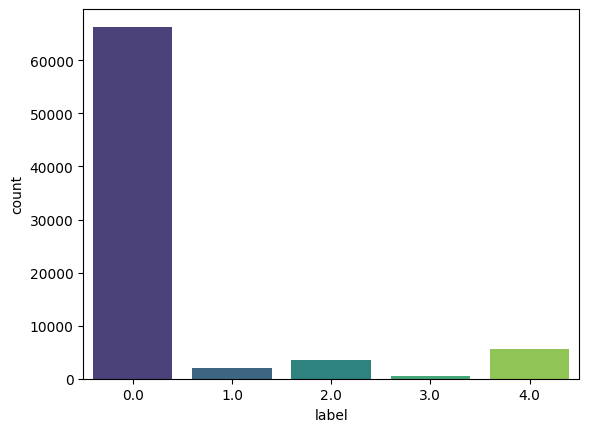

In [39]:
sns.countplot(x='label',data = train_df,palette='viridis')

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 1 to label
dtypes: float64(188)
memory usage: 125.6 MB


In [41]:
for col in train_df.columns:
    train_df[col] = train_df[col].astype('float16')

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 1 to label
dtypes: float16(188)
memory usage: 31.4 MB


In [43]:
#dataset is highly imbalanced and will need oversampling
X_train,y_train = train_df.drop('label',axis=1),train_df['label']
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
rnd = RandomOverSampler()
print(f"before : {Counter(y_train)}")
X_train_rnd,y_train_rnd = rnd.fit_resample(X_train,y_train)
print(f"after : {Counter(y_train_rnd)}")

before : Counter({0.0: 72470, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})
after : Counter({0.0: 72470, 1.0: 72470, 2.0: 72470, 3.0: 72470, 4.0: 72470})


In [44]:
X_train_rnd

,1,2,3,4,5,6,7,8,9,10,...,178,179,180,181,182,183,184,185,186,187
0,0.959961,0.863281,0.461426,0.196533,0.093994,0.125366,0.099731,0.088318,0.074097,0.082642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659668,0.186523,0.070251,0.070251,0.059448,0.056763,0.043243,0.054047,0.045959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925293,0.665527,0.541504,0.276123,0.196167,0.077332,0.071838,0.060760,0.066284,0.058014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967285,1.000000,0.831055,0.586914,0.356689,0.248779,0.145508,0.089172,0.117371,0.150269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927246,1.000000,0.626953,0.193481,0.094971,0.072510,0.043182,0.053528,0.093262,0.189941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362345,1.000000,0.798828,0.461182,0.235352,0.105286,0.074280,0.080505,0.080505,0.086670,0.080505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362346,0.834473,0.737793,0.653320,0.491943,0.346680,0.245972,0.185425,0.149170,0.129028,0.092712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362347,1.000000,0.893555,0.641602,0.429199,0.287354,0.287354,0.287354,0.301514,0.304932,0.329834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362348,1.000000,0.594727,0.601074,0.575195,0.562012,0.558594,0.522949,0.473877,0.415039,0.316895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


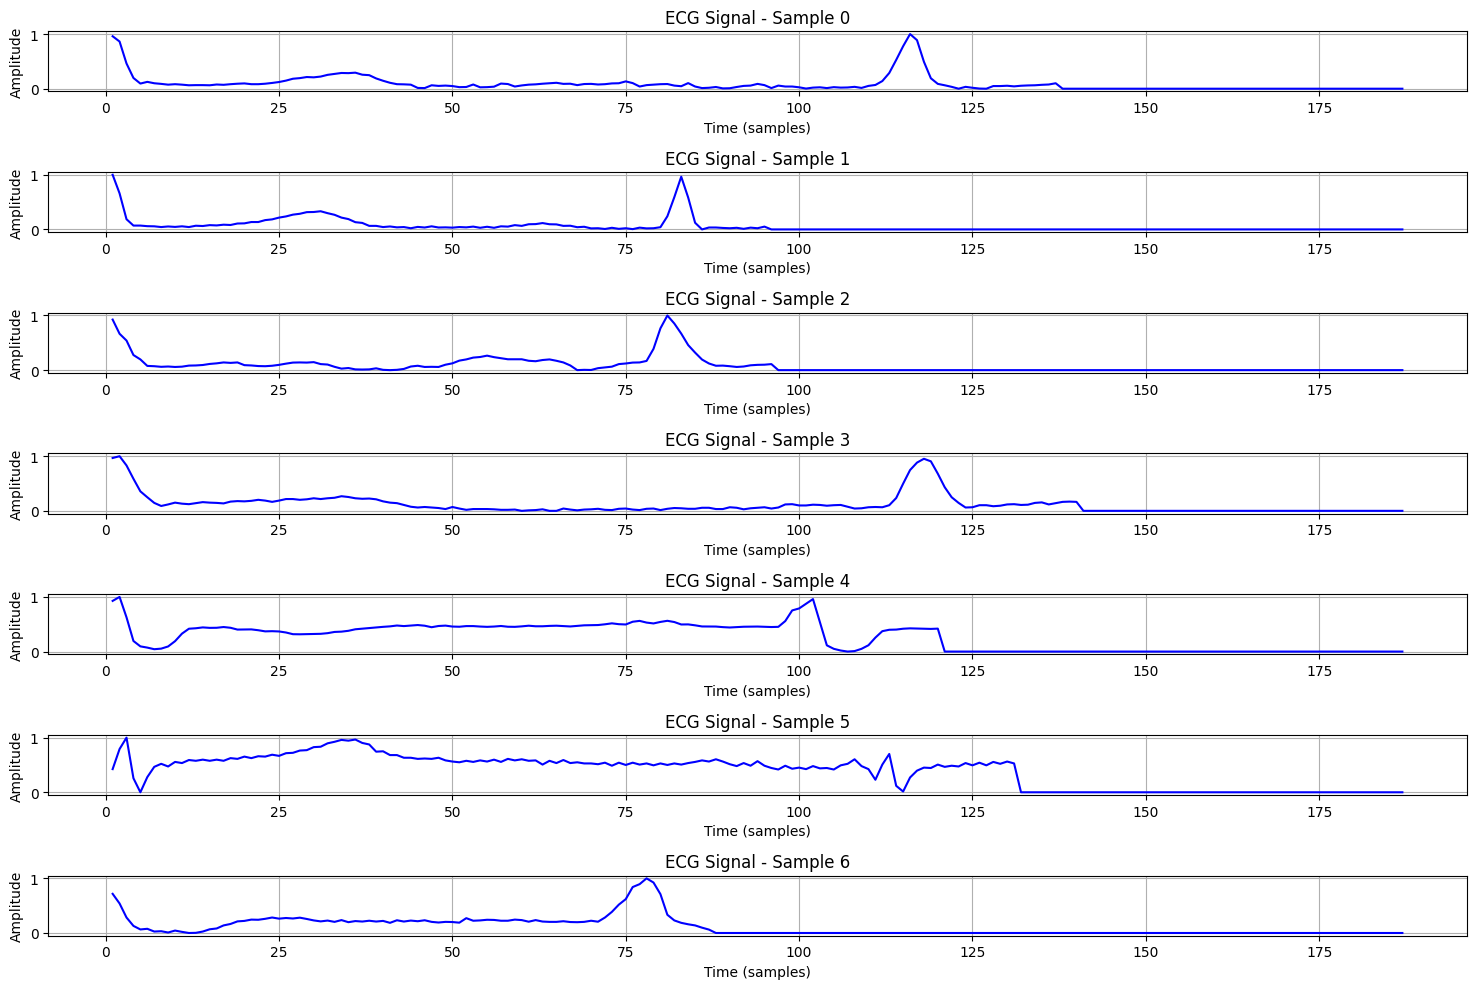

In [99]:
n_samples = 7 # Number of samples to visualize
plt.figure(figsize=(15, 10))
for i in range(n_samples):
    plt.subplot(n_samples, 1, i + 1)  # Create a subplot for each sample
    plt.plot(train_df.drop('label',axis=1).iloc[i], color='blue')
    plt.title(f'ECG Signal - Sample {i}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.grid()
plt.tight_layout()
plt.show()

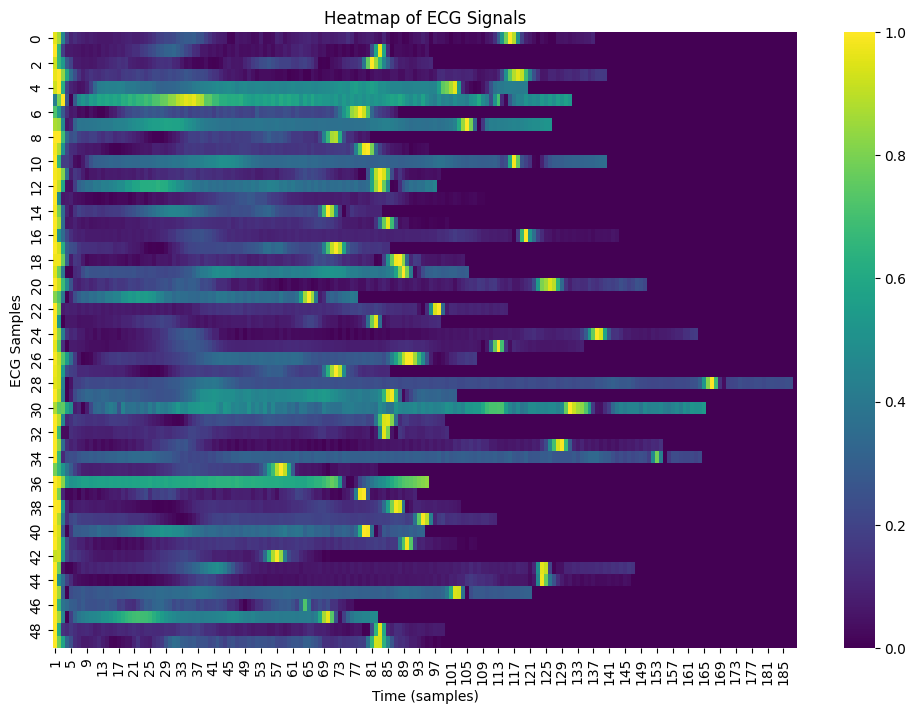

In [87]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.iloc[:50], cmap='viridis')  # Visualizing the first 50 samples
plt.title('Heatmap of ECG Signals')
plt.xlabel('Time (samples)')
plt.ylabel('ECG Samples')
plt.show()

In [103]:
import pandas as pd
import plotly.graph_objs as go

# Assuming train_df is your DataFrame and it has already been defined
# Create a Plotly figure
fig = go.Figure()

# Loop through the first 10 samples
for i in range(25):  # Change the range to visualize more signals
    ecg_signal = train_df.drop('label', axis=1).iloc[i]
    fig.add_trace(go.Scatter(y=ecg_signal, mode='lines', name=f'Sample {i}'))

# Update layout
fig.update_layout(
    title='ECG Signals - Multiple Samples',
    xaxis_title='Time (samples)',
    yaxis_title='Amplitude',
    legend_title='Samples',
    template='plotly_white'
)

# Show the interactive plot
fig.show()

In [45]:
y_train_rnd.values

array([0., 0., 0., ..., 4., 4., 4.], dtype=float16)

In [60]:
class ECGDataset(Dataset):
    def __init__(self,X,y):
        self.features = X.values
        self.labels = y.values
    def __len__(self):
        return len(self.features)
    def __getitem__(self,idx):
        feature = torch.Tensor(self.features[idx])
        label = torch.tensor(np.array(self.labels[idx], dtype=np.int64)) 
        return feature,label

In [61]:
X_test,y_test = test_df.drop('label',axis=1),test_df['label']

In [62]:
train_dataset = ECGDataset(X_train_rnd,y_train_rnd)
test_dataset = ECGDataset(X_test,y_test)

In [63]:
train_dataset[0]

(tensor([0.9600, 0.8633, 0.4614, 0.1965, 0.0940, 0.1254, 0.0997, 0.0883, 0.0741,
         0.0826, 0.0741, 0.0627, 0.0656, 0.0656, 0.0627, 0.0769, 0.0712, 0.0826,
         0.0912, 0.0969, 0.0826, 0.0826, 0.0912, 0.1054, 0.1225, 0.1482, 0.1824,
         0.1937, 0.2136, 0.2080, 0.2222, 0.2537, 0.2708, 0.2878, 0.2849, 0.2935,
         0.2563, 0.2478, 0.1880, 0.1453, 0.1083, 0.0826, 0.0798, 0.0741, 0.0142,
         0.0114, 0.0627, 0.0513, 0.0570, 0.0484, 0.0285, 0.0313, 0.0769, 0.0256,
         0.0285, 0.0370, 0.0940, 0.0854, 0.0399, 0.0598, 0.0741, 0.0798, 0.0912,
         0.0997, 0.1083, 0.0883, 0.0912, 0.0656, 0.0854, 0.0883, 0.0769, 0.0826,
         0.0969, 0.0997, 0.1339, 0.1025, 0.0399, 0.0656, 0.0741, 0.0826, 0.0854,
         0.0570, 0.0456, 0.1025, 0.0399, 0.0114, 0.0171, 0.0313, 0.0057, 0.0085,
         0.0313, 0.0513, 0.0570, 0.0883, 0.0656, 0.0114, 0.0570, 0.0399, 0.0399,
         0.0256, 0.0028, 0.0199, 0.0256, 0.0114, 0.0285, 0.0199, 0.0228, 0.0342,
         0.0142, 0.0513, 0.0

In [64]:
def pad_collate(batch):
    data = [item[0] for item in batch]
    label = [item[1] for item in batch] 
    max_size = max([item.size(0) for item in data])
    padded_sequence = [F.pad(item,(0,max_size-item.size(0))) for item in data]
    return torch.stack(padded_sequence),torch.tensor(label)

In [75]:
train_batch_size = 256
test_batch_size = 256
train_loader = DataLoader(train_dataset,train_batch_size,shuffle=True,collate_fn=pad_collate)
test_loader = DataLoader(test_dataset,test_batch_size,shuffle=False,collate_fn=pad_collate)

In [76]:
for X_train,y_train in train_loader:
    print(X_train,y_train)
    break

tensor([[0.9351, 0.5161, 0.5488,  ..., 0.0000, 0.0000, 0.0000],
        [0.6685, 0.5596, 0.4521,  ..., 0.0000, 0.0000, 0.0000],
        [0.9751, 1.0000, 0.3232,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0248, 0.0787,  ..., 0.0000, 0.0000, 0.0000],
        [1.0000, 0.9365, 0.7056,  ..., 0.0000, 0.0000, 0.0000],
        [0.9194, 0.7681, 0.1473,  ..., 0.0000, 0.0000, 0.0000]]) tensor([4, 4, 1, 4, 2, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 3, 2, 0, 1, 3, 3, 3, 0, 2,
        0, 4, 2, 3, 1, 3, 2, 1, 0, 2, 4, 3, 2, 2, 4, 4, 0, 2, 3, 3, 4, 1, 1, 3,
        0, 1, 3, 0, 1, 0, 4, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 4, 0, 4, 0, 1, 0,
        1, 2, 3, 4, 0, 2, 3, 3, 0, 3, 1, 4, 1, 2, 1, 2, 3, 2, 1, 0, 4, 0, 0, 4,
        2, 3, 0, 3, 4, 0, 1, 4, 3, 3, 0, 3, 1, 1, 4, 1, 1, 2, 0, 1, 2, 3, 1, 3,
        1, 4, 1, 2, 4, 0, 4, 2, 2, 1, 1, 2, 2, 2, 3, 1, 0, 1, 2, 1, 4, 1, 1, 3,
        2, 2, 2, 4, 0, 4, 4, 0, 4, 0, 1, 0, 4, 1, 1, 3, 0, 1, 0, 2, 4, 0, 2, 0,
        0, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4

In [77]:
class LSTM(nn.Module):
    def __init__(self,in_size,hidden_size,out_size=5,num_layers=1,bidirectional=False,p=0.4):
        super(LSTM,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_dir = 2 if bidirectional else 1
        self.dropout = nn.Dropout(p)
        self.lstm = nn.LSTM(in_size,hidden_size,num_layers=num_layers,bidirectional=bidirectional,batch_first=True)
        self.fc = nn.Linear(self.num_dir*self.hidden_size,out_size)
    def forward(self,x):
        hidden = self.init_hidden(x.size(0))
        lstm_out,hidden = self.lstm(x,hidden)
        lstm_out = self.dropout(lstm_out)
        pred = self.fc(lstm_out[:,-1,:])
        return pred
    def init_hidden(self,batch_size):
        hidden = (torch.zeros(self.num_dir*self.num_layers,batch_size,self.hidden_size).to(device),
                 torch.zeros(self.num_dir*self.num_layers,batch_size,self.hidden_size).to(device))
        return hidden

In [119]:
model = LSTM(X_train.size(1),64,out_size=5,num_layers=2,bidirectional=True,p=0.4).to(device)

In [120]:
num_epochs = 25
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [123]:
for epoch in range(num_epochs):
    model.train()
    for X_train,y_train in train_loader:
        X_train,y_train = X_train.to(device),y_train.to(device)
        y_pred = model(X_train.unsqueeze(1))
        loss = criterion(y_pred,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch : {epoch+1} loss : {loss.item()}")

epoch : 1 loss : 0.005060807801783085
epoch : 2 loss : 0.04079117625951767
epoch : 3 loss : 0.03276721388101578
epoch : 4 loss : 0.024525661021471024
epoch : 5 loss : 0.0016081343637779355
epoch : 6 loss : 0.0036584322806447744
epoch : 7 loss : 0.0022216709330677986
epoch : 8 loss : 0.0008536279201507568
epoch : 9 loss : 0.0016370215453207493
epoch : 10 loss : 0.014666049741208553
epoch : 11 loss : 0.006654406897723675
epoch : 12 loss : 0.0018622210482135415
epoch : 13 loss : 0.03501969948410988
epoch : 14 loss : 0.001606316422112286
epoch : 15 loss : 0.030053839087486267
epoch : 16 loss : 0.03071206621825695
epoch : 17 loss : 0.005236167460680008
epoch : 18 loss : 0.026806116104125977
epoch : 19 loss : 0.001184773282147944
epoch : 20 loss : 0.004198743030428886
epoch : 21 loss : 0.025750581175088882
epoch : 22 loss : 0.0019404158229008317
epoch : 23 loss : 0.016230350360274315
epoch : 24 loss : 0.10106147080659866
epoch : 25 loss : 0.008731919340789318


In [124]:
from sklearn.metrics import classification_report,f1_score
all_preds = []
all_labels = []

model.eval() 
with torch.no_grad():
    for X_test,y_test in test_loader:
        X_test,y_test = X_test.to(device),y_test.to(device)
        pred = model(X_test.unsqueeze(1))
        pred = torch.argmax(pred, dim=1)
        
        # Collect predictions and labels
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())

# Now, use classification_report with the collected predictions and labels
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     18117
           1       0.73      0.80      0.77       556
           2       0.93      0.93      0.93      1448
           3       0.70      0.80      0.74       162
           4       0.98      0.98      0.98      1608

    accuracy                           0.98     21891
   macro avg       0.87      0.90      0.88     21891
weighted avg       0.98      0.98      0.98     21891



### GRU

In [128]:
class GRU(nn.Module):
    def __init__(self,in_size,hidden_size,out_size=5,num_layers=1,bidirectional=False,p=0.4):
        super(GRU,self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.num_dir = 2 if bidirectional else 1
        self.dropout = nn.Dropout(p)
        self.gru = nn.GRU(in_size,hidden_size,num_layers=num_layers,bidirectional=bidirectional,batch_first=True)
        self.fc = nn.Linear(self.num_dir*self.hidden_size,out_size)
    def forward(self,x):
        hidden = self.init_hidden(x.size(0))
        gru_out,hidden = self.gru(x,hidden)
        gru_out = self.dropout(gru_out)
        pred = self.fc(gru_out[:,-1,:])
        return pred
    def init_hidden(self,batch_size):
        hidden = (torch.zeros(self.num_dir*self.num_layers,batch_size,self.hidden_size).to(device))
        return hidden

In [132]:
gru_model = GRU(X_train.size(1),128,out_size=5,num_layers=1,bidirectional=True,p=0.6).to(device)

In [133]:
num_epochs = 50
optimizer = torch.optim.Adam(gru_model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()
for epoch in range(num_epochs):
    gru_model.train()
    for X_train,y_train in train_loader:
        X_train,y_train = X_train.to(device),y_train.to(device)
        y_pred = gru_model(X_train.unsqueeze(1))
        loss = criterion(y_pred,y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epoch : {epoch+1} loss : {loss.item()}")

epoch : 1 loss : 0.49161630868911743
epoch : 2 loss : 0.4292179346084595
epoch : 3 loss : 0.24359971284866333
epoch : 4 loss : 0.293611079454422
epoch : 5 loss : 0.18985790014266968
epoch : 6 loss : 0.2121078073978424
epoch : 7 loss : 0.23396731913089752
epoch : 8 loss : 0.09209291636943817
epoch : 9 loss : 0.12358955293893814
epoch : 10 loss : 0.24920418858528137
epoch : 11 loss : 0.12231393158435822
epoch : 12 loss : 0.17814944684505463
epoch : 13 loss : 0.15700533986091614
epoch : 14 loss : 0.09005576372146606
epoch : 15 loss : 0.0660240575671196
epoch : 16 loss : 0.2109760344028473
epoch : 17 loss : 0.09511306136846542
epoch : 18 loss : 0.16759765148162842
epoch : 19 loss : 0.11583253741264343
epoch : 20 loss : 0.09655381739139557
epoch : 21 loss : 0.11739134043455124
epoch : 22 loss : 0.09679649025201797
epoch : 23 loss : 0.09532532840967178
epoch : 24 loss : 0.10621543973684311
epoch : 25 loss : 0.18430840969085693
epoch : 26 loss : 0.22613584995269775
epoch : 27 loss : 0.1183030

In [134]:
from sklearn.metrics import classification_report,f1_score
all_preds = []
all_labels = []

gru_model.eval() 
with torch.no_grad():
    for X_test,y_test in test_loader:
        X_test,y_test = X_test.to(device),y_test.to(device)
        pred = gru_model(X_test.unsqueeze(1))
        pred = torch.argmax(pred, dim=1)
        
        # Collect predictions and labels
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y_test.cpu().numpy())

# Now, use classification_report with the collected predictions and labels
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18117
           1       0.54      0.83      0.66       556
           2       0.90      0.96      0.93      1448
           3       0.58      0.85      0.69       162
           4       0.97      0.98      0.98      1608

    accuracy                           0.96     21891
   macro avg       0.80      0.92      0.85     21891
weighted avg       0.97      0.96      0.97     21891

